# 2. Project Management Agents 📌

### **Que aprenderemos** 📚
1. 🧠 Utiliza Langchain agents.  
2. 🛠️ Utiliza Tools.  
3. 📜 Utiliza langflow para el logging.  
4. 💡 No requiere suscripciones, utiliza solamente modelos de LLM locales y ligeros, en este caso usamos `qwen3:7b` sobre `ollama`.

### **De qué trata el proyecto** 📚
Este proyecto realiza operaciones sobre los mails y los etiqueta según el proyecto y el objeto del mail.  
En este caso, recupera el último email, identifica de qué proyecto se trata, identifica cuál es el objeto del email y modifica el email añadiéndole las etiquetas correspondientes. 📧🔍🏷️

### **Instalación de pre-requisitos** 🚀

Esta línea es una instrucción para instalar paquetes de software en tu entorno de programación de Python. Es similar a usar `pip install` en la terminal, pero el `%` al principio es una "magic command" que se usa en entornos interactivos como Jupyter Notebook o Google Colab.

**¿Cómo funciona?** 🧠

1. **`%pip`:** Invoca el instalador de paquetes de Python, `pip`. 🛠️
2. **`install`:** Le dice a `pip` que queremos instalar algo. 📦
3. **`-U --upgrade`:** Estas son opciones. `-U` es una forma abreviada de `--upgrade`. Juntas, le dicen a `pip` que actualice los paquetes a la última versión si ya están instalados. 🔧
4. **`pip`:** Este es el gestor de paquetes de Python. Es como una tienda donde puedes encontrar e instalar bibliotecas y herramientas creadas por otros programadores. 🛍️
5. **`langchain dotenv langchain_ollama langfuse pandas langgraph mcp langchain_mcp_adapters`:** Estos son los nombres de los paquetes específicos que queremos instalar. `pip` los buscará en el "Índice de Paquetes de Python" (PyPI), los descargará y los instalará en tu entorno. 📥

**Descripción de los paquetes:** 📚

- **`langchain`:** Es un framework que simplifica la creación de aplicaciones que utilizan modelos de lenguaje grandes (LLMs). Piensa en ello como un conjunto de herramientas para conectar LLMs con otras fuentes de datos y lógica. 🤖
- **`dotenv`:** Permite cargar variables de entorno desde un archivo `.env`. Esto es útil para guardar información sensible (como claves de API) fuera de tu código. 🔒
- **`langchain_ollama`:** Una integración específica para usar modelos de lenguaje de la plataforma Ollama dentro de Langchain. Ollama te permite ejecutar LLMs localmente. 🧠
- **`langfuse`:** Una plataforma para monitorear, depurar y mejorar tus aplicaciones Langchain. Te ayuda a entender cómo se están comportando tus LLMs. 📊
- **`pandas`:** Una biblioteca esencial para el análisis de datos en Python. Proporciona estructuras de datos (como DataFrames) para organizar y manipular datos de manera eficiente. 📊
- **`langgraph`:** Una biblioteca para construir aplicaciones Langchain más complejas utilizando grafos. Esto te permite definir flujos de trabajo más sofisticados para tus LLMs. 📐
- **`langchain_mcp_adapters`:** De manera similar a "mcp", sin más contexto, es difícil saber con certeza a qué se refiere. Es probable que esta biblioteca proporcione adaptadores o integraciones específicas para usar Langchain con la biblioteca "mcp". 🔗

**Archivo `requirements.txt`** 📄

Un archivo `requirements.txt` es una lista de todos los paquetes de Python que necesita tu proyecto para funcionar correctamente. Se ve así:

```
langchain
dotenv
langchain_ollama
langfuse
pandas
langgraph
mcp
langchain_mcp_adapters
```

Cada línea contiene el nombre de un paquete. Opcionalmente, puedes especificar versiones exactas:

```
langchain==0.0.123
pandas>=1.5.0
```

**¿Por qué usar `requirements.txt`?** 🧩

- **Reproducibilidad:** Asegura que cualquier persona que clone tu proyecto pueda instalar exactamente las mismas dependencias que tú, evitando problemas de compatibilidad. 🔄
- **Facilidad de instalación:** En lugar de instalar cada paquete individualmente, puedes ejecutar `pip install -r requirements.txt` para instalar todo de una vez. 📦

**¿Qué es un entorno virtual (`.venv`) ?** 🧱

Un entorno virtual es un directorio aislado que contiene su propia instalación de Python y sus propios paquetes instalados. Piensa en ello como una "caja de arena" para tu proyecto.

**¿Por qué usar entornos virtuales?** 🧠

- **Aislamiento de dependencias:** Diferentes proyectos pueden tener diferentes requisitos de bibliotecas. Un entorno virtual asegura que las dependencias de un proyecto no entren en conflicto con las de otro. 🧰
- **Control de versiones:** Puedes usar versiones específicas de las bibliotecas para cada proyecto, incluso si tienes versiones diferentes instaladas globalmente en tu sistema. 📌
- **Limpieza:** Facilita la eliminación completa de las dependencias de un proyecto cuando ya no lo necesitas. 🧹
- **Reproducibilidad:** Los entornos virtuales, combinados con `requirements.txt`, garantizan que puedas recrear el mismo entorno en cualquier máquina. 🔄

**Cómo se relaciona `.venv` con `requirements.txt` y `%pip install ...`** 📌

1. **Creación:** Primero, creas un entorno virtual. La forma más común es usar el módulo `venv` que viene con Python:

    ```bash
    python3 -m venv .venv
    ```

    Esto crea un directorio llamado `.venv` (es una convención común, pero puedes llamarlo como quieras). 📁

2. **Activación:** Después de crear el entorno, debes activarlo:

    - **Linux/macOS:**

        ```bash
        source .venv/bin/activate
        ```

    - **Windows (CMD):**

        ```bash
        .venv\Scripts\activate.bat
        ```

    - **Windows (PowerShell):**

        ```bash
        .venv\Scripts\Activate.ps1
        ```

    Cuando el entorno está activo, verás el nombre del entorno (por ejemplo, `(.venv)`) al principio de tu línea de comandos. 🧾

In [1]:
%%capture --no-stderr
%pip install -U --upgrade pip langchain dotenv langchain_ollama langfuse pandas langgraph

# Usar Langfuse 🚀


### 1. **Crear una cuenta** 📝  
Ve a [Langfuse](https://langfuse.com) y haz clic en **“Sign Up”**.  
Puedes registrarte con tu correo, contraseña o usar **Google** o **Azure AD** .  
⚠️ Asegúrate de seleccionar tu **Data Region** (por ejemplo, **EU**) al registrarte .


### 2. **Crear un token (API Key)** 🔑  
Una vez dentro:  
- Ve a la **configuración de tu proyecto**.  
- Busca la sección **“API Keys”** o **“Create API credentials”**.  
- Haz clic en **“Create API Keys”** y copia tu **Public Key**, **Secret Key** y el **Host** .

¡Listo! Ya puedes usar Langfuse en tu código con esas credenciales 🎯


💡 *Consejo profesional*: Nunca compartas tu **Secret Key**. Guárdala como variable de entorno.

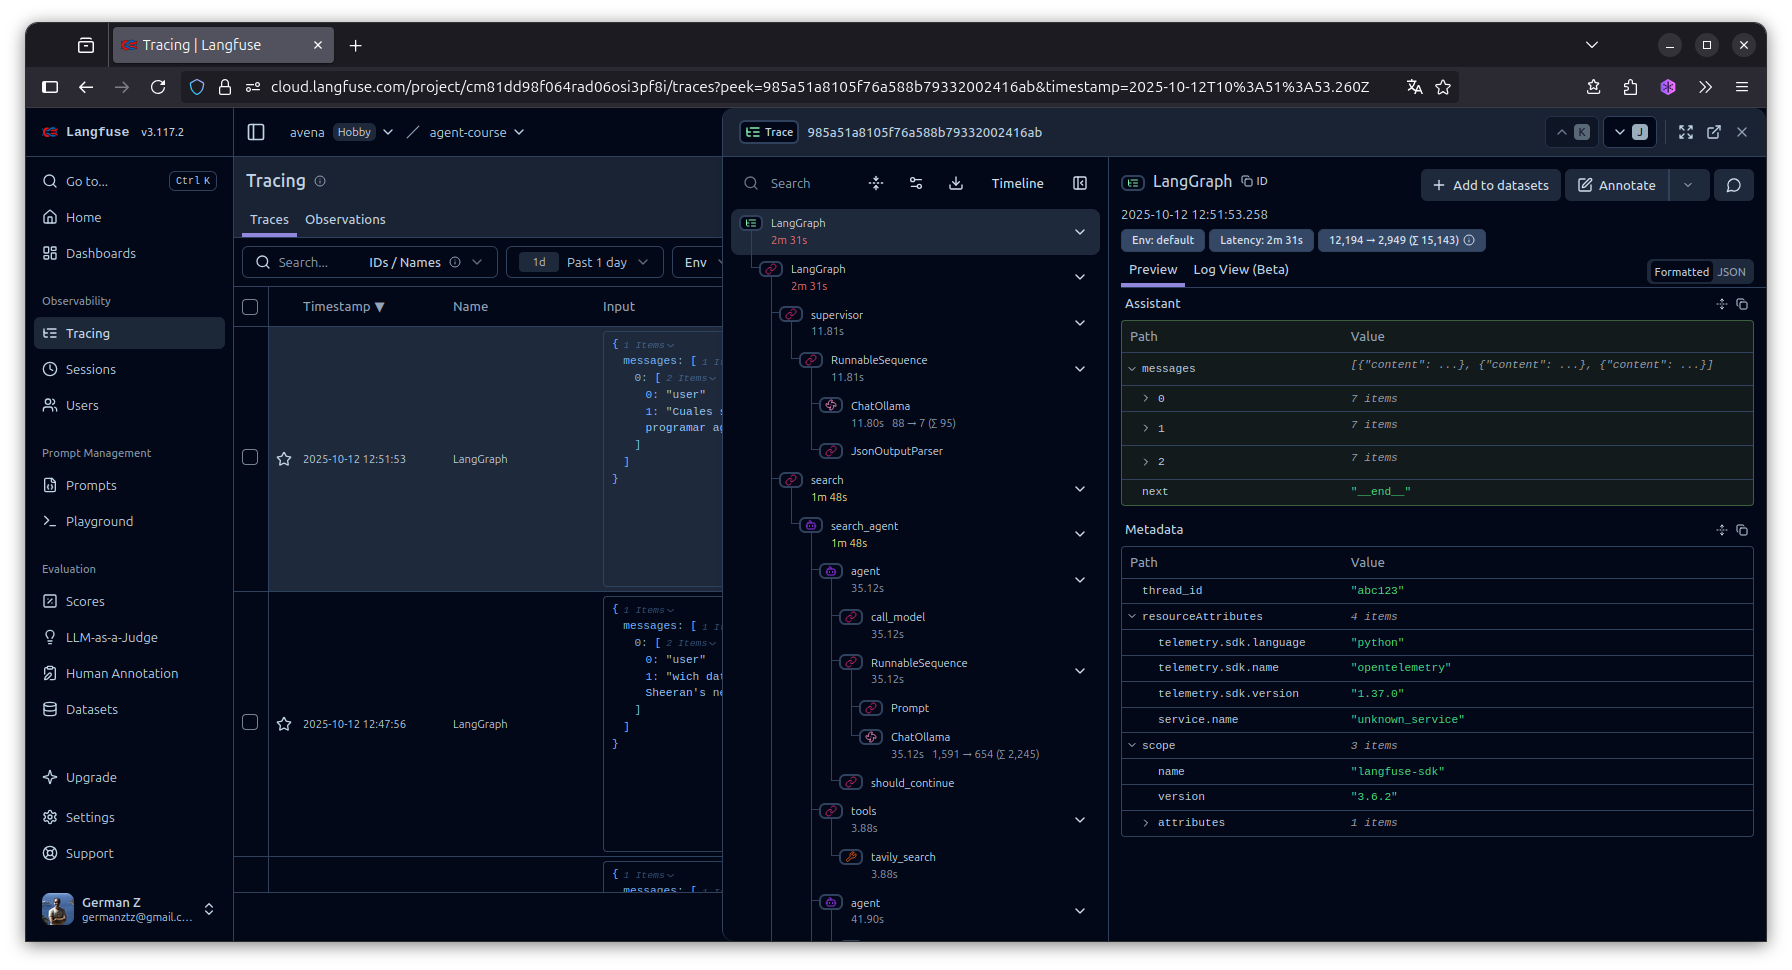

### 📁 **Carga de dependencias**
```python
from langfuse.langchain import CallbackHandler
from dotenv import load_dotenv
import os
```
- 📌 **`from langfuse.langchain import CallbackHandler`**: Importa la clase `CallbackHandler` de `langfuse`, que se usa para rastrear y registrar el comportamiento de las llamadas a modelos de lenguaje.
- 📌 **`from dotenv import load_dotenv`**: Importa la función `load_dotenv` de `dotenv`, que carga las variables de entorno desde un archivo `.env`.
- 📌 **`import os`**: Importa el módulo `os`, que permite interactuar con el sistema operativo (por ejemplo, acceder a variables de entorno).

 🔄 **Carga de variables de entorno**
```python
load_dotenv()
```
- 🚀 **`load_dotenv()`**: Carga las variables de entorno desde el archivo `.env` en el directorio actual. Esto es útil para gestionar claves API, rutas, etc., sin hardcodearlas en el código.

 📁 **Definición de carpeta de trabajo**
```python
workfolder = os.getenv('WORKFOLDER')
```
- 🗂️ **`os.getenv('WORKFOLDER')`**: Obtiene el valor de la variable de entorno `WORKFOLDER`, que probablemente define una carpeta donde se guardarán los archivos o datos del proyecto.

 🧠 **Inicialización del CallbackHandler**
```python
langfuse_handler = CallbackHandler() 
```
- 🧠 **`CallbackHandler()`**: Crea una instancia del `CallbackHandler` de `langfuse`, que se utiliza para **rastrear** y **registrar** las interacciones con modelos de lenguaje, como `LangChain` o `LangGraph`.

 🔄 **Configuración del modelo de lenguaje**
```python
llm_config = {"configurable": {"thread_id": "abc123"}, "recursion_limit": 20, "callbacks": [langfuse_handler]}
```
- 🔄 **`llm_config`**: Define una configuración para el modelo de lenguaje.
  - 🧠 **`"configurable": {"thread_id": "abc123"}`**: Asocia la configuración a un hilo de ejecución específico (`thread_id`), útil para manejar múltiples conversaciones o sesiones.
  - 🧠 **`"recursion_limit": 20`**: Limita la profundidad de la recursión para evitar bucles infinitos.
  - 🧠 **`"callbacks": [langfuse_handler]`**: Asocia el `CallbackHandler` para que se active durante las llamadas al modelo de lenguaje.



In [2]:
from langfuse.langchain import CallbackHandler
from dotenv import load_dotenv
import os

# load environment variables from .env file
load_dotenv()
workfolder = os.getenv('WORKFOLDER')

# Initialize Langfuse CallbackHandler for LangGraph/Langchain (tracing)
langfuse_handler = CallbackHandler() 
llm_config = {"configurable": {"thread_id": "abc123"}, "recursion_limit": 20, "callbacks": [langfuse_handler]}

### 📁 **Preparar los datos de la empresa**

 📌 **Importa la biblioteca pandas**
```python
import pandas as pd
```
> 🧠 **Explicación:** Importamos la biblioteca `pandas` que nos ayuda a manejar datos de forma eficiente.

 📁 **Define una lista de proyectos**
```python
projects = [
    {
        "tag": "ATCLIBOT",
        "name": "Chatbot de Atención al Cliente Potenciado por IA",
        "description": "Chatbot de atención al cliente...",
        "status": "Actualmente entrenando al chatbot con las últimas transcripciones de servicio al cliente.",
    },
    ...
]
```
> 🧠 **Explicación:** Creamos una lista de proyectos con información detallada como etiqueta, nombre, descripción y estado. Cada proyecto es un **diccionario**.

 📧 **Define una lista de razones para enviar correos**
```python
email_reasons = [
    {
        "reason": "UPDATE",
        "description": "A task of the project has finished",
        "action": "update the project status and notify the PM by email with the new status",
    }, 
    ...
]
```
> 🧠 **Explicación:** Creamos una lista de razones para enviar correos electrónicos, cada una con una descripción y una acción específica.

 📤 **Exporta los datos a archivos CSV**
```python
pd.DataFrame(projects).to_csv(os.path.join(workfolder, "projects.csv"), index=False)
pd.DataFrame(email_reasons).to_csv(os.path.join(workfolder, "email_reasons.csv"), index=False)
```
> 🧠 **Explicación:** Convertimos las listas en **DataFrames** y los exportamos a archivos CSV en la carpeta `workfolder` sin incluir los índices.



In [3]:
import pandas as pd

projects = [
    {
        "tag": "ATCLIBOT",
        "name": "Chatbot de Atención al Cliente Potenciado por IA",
        "description": "Chatbot de atención al cliente potenciado por IA que pueda manejar una amplia gama de consultas de clientes y proporcionar respuestas instantáneas. \
            El chatbot se integrará con el sistema de atención al cliente existente de la empresa y utilizará el procesamiento del lenguaje natural (PNL) para comprender y responder a las consultas de los clientes con precisión. \
            El chatbot será entrenado con datos históricos de atención al cliente para garantizar que pueda manejar los problemas comunes de manera efectiva.",
        "status": "Actualmente entrenando al chatbot con las últimas transcripciones de servicio al cliente.",
    },
    {
        "tag": "ECOMONITOR",
        "name": "Plataforma de Monitoreo de Energía Renovable",
        "description": "Plataforma de monitoreo de energía renovable que permite a los usuarios rastrear su consumo y producción de energía en tiempo real. \
            La plataforma incluirá características como análisis de uso de energía, seguimiento del rendimiento de los paneles solares y monitoreo del almacenamiento de baterías. \
            La plataforma estará diseñada para ser fácil de usar y proporcionará información práctica para ayudar a los usuarios a reducir su consumo de energía y disminuir su huella de carbono.",
        "status": "Realización de pruebas de usuario en la interfaz de la plataforma y la visualización de datos.",
    },
    {
        "tag": "DEVLEARN",
        "name": "Plataforma de Aprendizaje en Línea para Programación",
        "description": "Plataforma de aprendizaje en línea para programación que proporciona cursos interactivos, desafíos de codificación y retroalimentación en tiempo real a los estudiantes. \
            La plataforma estará diseñada para ser accesible a usuarios de todos los niveles de habilidad, desde principiantes hasta programadores avanzados. \
            Incluirá características como tutoriales en video, ejercicios de codificación y un foro comunitario para que los estudiantes se conecten y colaboren.",
        "status": "Implementando nuevos desafíos de codificación para mejorar la participación del usuario.",
    }
]

email_reasons = [
    {
        "reason": "UPDATE",
        "description": "A task of the project has finished",
        "action": "update the project status and notify the PM by email with the new status",
    }, 
    {
        "reason": "PROBLEM",
        "description": "Something has occurred that may delay the project",
        "action": "ask the analyst and technician to investigate the problem by email and put the PM in copy"
    },
    {
        "reason": "REQUEST",
        "description": "Something has been requested that changes the project",
        "action": "ask the analyst by email to evaluate the changes and ask the PM for approval"
    },
]

pd.DataFrame(projects).to_csv(os.path.join(workfolder, "projects.csv"), index=False)
pd.DataFrame(email_reasons).to_csv(os.path.join(workfolder, "email_reasons.csv"), index=False)


### 🧠 Funcion: `send_email()` 📧

 🧠 1. **Importaciones de módulos**
```python
from typing import Annotated, List, Dict, Any, Optional
from langchain_core.tools import tool
import pandas as pd
import os
import datetime
```
- **🎯 Propósito:** Importar módulos necesarios para el funcionamiento del código.
- **💡 Explicación:** 
  - `typing` ayuda a definir tipos de datos.
  - `langchain_core.tools` define herramientas para el framework LangChain.
  - `pandas`, `os` y `datetime` se usan para manejar datos, archivos y fechas.

📧 2. **Definición de la función `send_email`**
```python
@tool
def send_email(from_email: Annotated[str, "The sender's email address."], 
    to_email:Annotated[str, "The recipient's email address."], 
    subject:Annotated[str, "The subject of the email."], 
    body:Annotated[str, "The body of the email."]
    ) -> Annotated[str, "result message"]:
    """ Sends an email."""
```
- **🎯 Propósito:** Definir una función que envía correos electrónicos.
- **💡 Explicación:** 
  - `@tool` marca esta función como una herramienta usable en LangChain.
  - Los parámetros (`from_email`, `to_email`, etc.) están anotados con descripciones.
  - La función devuelve un mensaje de resultado.

 📄 3. **Creación del objeto `email`**
```python
    try:
        now = datetime.datetime.now()
        date_string = now.strftime("%d/%m/%Y %H:%M:%S")
        email = {'date': date_string, 'from_email': from_email, 'to_email': to
        to_email, 'tags': '', 'subject': subject, 'body': body}
```
- **🎯 Propósito:** Crear un diccionario que represente el correo electrónico.
- **💡 Explicación:** 
  - Se obtiene la fecha actual y se convierte a una cadena.
  - Se construye el correo con los campos: fecha, remitente, destinatario, asunto, cuerpo y etiquetas (vacío por defecto).

 📁 4. **Gestión de archivos CSV**
```python
        file_path = os.path.join(workfolder, "emails.csv")
        if os.path.exists(file_path):
            emails_df = pd.read_csv(file_path, index_col='id')
            emails_df = pd.concat([emails_df, pd.DataFrame([email])], ignore_index=True)
        else:
            emails_df = pd.DataFrame([email])
```
- **🎯 Propósito:** Guardar el correo en un archivo CSV.
- **💡 Explicación:** 
  - Se construye la ruta del archivo `emails.csv`.
  - Si el archivo ya existe, se leen los datos y se añade el nuevo correo.
  - Si no existe, se crea un nuevo DataFrame con el correo.

 📤 5. **Guardado del archivo y retorno del resultado**
```python
        emails_df.to_csv(file_path, index=True, index_label='id')
        return "email sent successfully"
    except Exception as e:
       return f"email sending failed {e}"
```
- **🎯 Propósito:** Guardar el archivo y devolver un mensaje de éxito o error.
- **💡 Explicación:** 
  - Se guarda el DataFrame en el archivo CSV con índice como `id`.
  - Si hay un error, se captura y se devuelve un mensaje de error con detalles.


In [4]:
from typing import Annotated, List, Dict, Any, Optional
from langchain_core.tools import tool
import pandas as pd
import os
import datetime


@tool
def send_email(from_email: Annotated[str, "The sender's email address."], 
    to_email:Annotated[str, "The recipient's email address."], 
    subject:Annotated[str, "The subject of the email."], 
    body:Annotated[str, "The body of the email."]
    ) -> Annotated[str, "result message"]:
    """ Sends an email."""
    try:
        now = datetime.datetime.now()
        date_string = now.strftime("%d/%m/%Y %H:%M:%S")
        email = {'date': date_string, 'from_email': from_email, 'to_email': to_email, 'tags': '', 'subject': subject, 'body': body}
        file_path = os.path.join(workfolder, "emails.csv")
        if os.path.exists(file_path):
            emails_df = pd.read_csv(file_path, index_col='id')
            emails_df = pd.concat([emails_df, pd.DataFrame([email])], ignore_index=True)
        else:
            emails_df = pd.DataFrame([email])

        emails_df.to_csv(file_path, index=True, index_label='id')
        return "email sent successfully"
    except Exception as e:
       return f"email sending failed {e}"


print('send_email:', send_email.invoke(input={"from_email":"admin@example.com", "to_email":"user@example.com", "subject":"Test Subject", "body":"This is a test email"}))

send_email: email sent successfully


### 🧠 Funcion: `get_emails()` 📧

```python
@tool
def get_emails() -> dict:
    """ Returns the last email received by the system, in json: {'id': 0, 'date': '', 'from_email': '', 'to_email': '', 'tags': '', 'subject': '', 'body': ''}."""
```

✅ **¿Qué hace?**  
- `@tool`: Indica que esta función es una **herramienta** que puede usarse en un sistema de IA.  
- La función `get_emails()` devuelve el **último email sin etiquetas**, en formato JSON.  
- Si no hay emails sin etiquetas, devuelve un mensaje de error: `"No new messages"`.

📤 **3. Leer los Emails desde un CSV 📁**

```python
emails_df = pd.read_csv(os.path.join(workfolder, "emails.csv"), index_col='id')
```

✅ **¿Qué hace?**  
- Lee un archivo CSV llamado `emails.csv` desde la carpeta `workfolder`.  
- Crea un **DataFrame** (tabla de datos) con columnas como `id`, `date`, `from_email`, etc.  
- El `index_col='id'` significa que el campo `id` será la **clave principal** de la tabla.

🔍 **4. Filtrar Emails sin Etiquetas 🧾**

```python
emails_without_tags = emails_df[emails_df['tags'].isnull() | (~emails_df['tags'].fillna('').str.contains(','))]
```

✅ **¿Qué hace?**  
- Filtra los emails que tienen **etiquetas vacías o nulas** (`isnull()`) o que **no contienen comas** en las etiquetas (`str.contains(',')`).  
- Esto significa que los emails que **no tienen etiquetas asignadas** se seleccionan.

 ✅ **5. Verificar si hay Emails sin Etiquetas 📋**

```python
if not emails_without_tags.empty:
    return emails_without_tags.fillna('').reset_index().sample(1).iloc[0].to_dict()
else:
    return "No new messages"
```

✅ **¿Qué hace?**  
- Si hay emails sin etiquetas, selecciona **uno al azar** y lo devuelve en formato JSON.  
- Si no hay emails, devuelve un mensaje: `"No new messages"`.



In [5]:
from typing import Annotated, List, Dict, Any, Optional
from langchain_core.tools import tool
import pandas as pd
import os


@tool
def get_emails() -> dict:
    """ Returns the last email received by the system, in json: {'id': 0, 'date': '', 'from_email': '', 'to_email': '', 'tags': '', 'subject': '', 'body': ''}."""
    emails_df = pd.read_csv(os.path.join(workfolder, "emails.csv"), index_col='id')

    # Filter for emails with empty or NaN tags
    emails_without_tags = emails_df[emails_df['tags'].isnull() | (~emails_df['tags'].fillna('').str.contains(','))]

    if not emails_without_tags.empty:
        return emails_without_tags.fillna('').reset_index().sample(1).iloc[0].to_dict()
    else:
        return "No new messages"



### 🧾 Función `get_projects()`

- 🧾 La función `get_projects()` carga datos desde un CSV.
- 📊 Convierte los datos en un formato JSON fácil de usar.
- 📤 Devuelve una lista de proyectos.


In [6]:
from typing import Annotated, List, Dict, Any, Optional
from langchain_core.tools import tool
import pandas as pd
import os

@tool 
def get_projects() -> dict:
    """ Returns the list of the projects, in json: [{'tag':'','name':'','description':''}] """
    projects_df = pd.read_csv(os.path.join(workfolder, "projects.csv"))
    return projects_df[['tag','name','description']].to_dict( orient="records")


### 📌 **1. Función `modify_email`**
- **Propósito**: Agregar una etiqueta a un correo electrónico específico.
- **Parámetros**:
  - `email_id`: ID del correo que queremos etiquetar.
  - `tag_string`: Etiqueta que queremos agregar.
- **Retorna**: Mensaje de éxito o error al intentar modificar el correo.

 📁 **2. Leer el archivo CSV**
```python
emails_df = pd.read_csv(os.path.join(workfolder, "emails.csv"), index_col='id')
```
- **Propósito**: Carga los correos desde un archivo CSV llamado `emails.csv`.
- **Detalles**: Usa `pandas` para leer el archivo y establece la columna `id` como índice.

 📌 **3. Obtener las etiquetas actuales**
```python
tags = emails_df.at[email_id, 'tags'] if pd.notna(emails_df.at[email_id, 'tags']) else ''
```
- **Propósito**: Extrae las etiquetas existentes del correo con el `email_id` dado.
- **Si no hay etiquetas**: Asigna una cadena vacía (`''`).

 🔄 **4. Convertir etiquetas a lista (si es necesario)**
```python
tags = tags.split(',') if len(tags) > 1 else []
```
- **Propósito**: Si las etiquetas están en formato de cadena separada por comas, las convierte en una lista.
- **Si no hay comas**: Crea una lista vacía.

 ✅ **5. Agregar la etiqueta**
```python
tags.append(tag_string)
```
- **Propósito**: Añade la etiqueta `tag_string` a la lista.

 🔄 **6. Eliminar duplicados**
```python
tags = list(set(tags))
```
- **Propósito**: Elimina duplicados usando `set` (que no permite elementos repetidos).
- **Resultado**: Una lista de etiquetas únicas.

 📌 **7. Unir etiquetas en una cadena**
```python
tags = ','.join(tags)
```
- **Propósito**: Convierte la lista de etiquetas en una cadena separada por comas.
- **Ejemplo**: `['tag1', 'tag2']` → `'tag1,tag2'`

 📝 **8. Actualizar el correo con la nueva etiqueta**
```python
emails_df.at[email_id, 'tags'] = str(tags)
```
- **Propósito**: Guarda las etiquetas actualizadas en el correo con el `email_id`.

 📁 **9. Guardar los cambios en el archivo CSV**
```python
emails_df.to_csv(os.path.join(workfolder, "emails.csv"), index=True, index_label='id')
```
- **Propósito**: Guarda los datos actualizados en el mismo archivo CSV.
- **Detalles**: Mantiene el índice (`id`) para futuras referencias.

 ⚠️ **10. Manejo de errores**
```python
except Exception as e:
    return f"email modifying failed {e}"
```
- **Propósito**: Si ocurre un error en cualquier parte del código, captura la excepción y devuelve un mensaje de error.


In [7]:
from typing import Annotated, List, Dict, Any, Optional
from langchain_core.tools import tool
import pandas as pd
import os

@tool
def modify_email(email_id: Annotated[int, "The ID of the email to tag."], 
    tag_string: Annotated[str, "The tag to create."]
    ) -> Annotated[str, "result message"]:
    """ Modifies an email identified by its ID, adding a tag to it."""
    try:
        emails_df = pd.read_csv(os.path.join(workfolder, "emails.csv"), index_col='id')
        tags = emails_df.at[email_id, 'tags'] if pd.notna(emails_df.at[email_id, 'tags']) else ''
        tags = tags.split(',') if len(tags) > 1 else []
        tags.append(tag_string)
        tags = list(set(tags))
        tags = ','.join(tags)
        emails_df.at[email_id, 'tags'] = str(tags)
        emails_df.to_csv(os.path.join(workfolder, "emails.csv"), index=True, index_label='id')
        return f"email {email_id} updated successfully with tag {tag_string}"
    except Exception as e:
        return f"email modifying failed {e}"



### 🧾 Función `get_reasons()`

- 🧾 La función `get_reasons()` carga datos desde un CSV.
- 📊 Convierte los datos en un formato JSON fácil de usar.
- 📤 Devuelve una lista de razones para enviar correos electrónicos.

In [8]:
from typing import Annotated, List, Dict, Any, Optional
from langchain_core.tools import tool
import pandas as pd
import os


@tool
def get_reasons() -> dict:
    """ Returns the list of reasons for sending an email, in json: [{ 'reason':'','description':'','action':'' }]. 
    """
    email_reasons_df = pd.read_csv(os.path.join(workfolder, "email_reasons.csv"))
    return email_reasons_df.to_dict(orient="records")

print(get_reasons.invoke(''))

[{'reason': 'UPDATE', 'description': 'A task of the project has finished', 'action': 'update the project status and notify the PM by email with the new status'}, {'reason': 'PROBLEM', 'description': 'Something has occurred that may delay the project', 'action': 'ask the analyst and technician to investigate the problem by email and put the PM in copy'}, {'reason': 'REQUEST', 'description': 'Something has been requested that changes the project', 'action': 'ask the analyst by email to evaluate the changes and ask the PM for approval'}]


🎯 **Código Explicado:**

- 📦 **`pm_operations_tools`**: Es una lista de herramientas (funciones) que el agente puede usar para interactuar con proyectos y correos electrónicos.
- 🤖 **`create_react_agent`**: Crea un agente de inteligencia artificial llamado "simple_agent" que usa el modelo `qwen3`.
- 🛠️ **`tools=pm_operations_tools`**: Le da al agente las herramientas necesarias para realizar tareas como leer, modificar y enviar correos, o gestionar proyectos.
- 🧠 **`model=ChatOllama(model="qwen3")`**: Especifica que el agente usa el modelo de lenguaje Qwen3 para entender y responder.
- 📄 **`response_format='json'`**: Define que las respuestas del agente estarán en formato JSON, fácil de procesar.
- 💬 **`prompt="You are a helpful assistant."`**: Es el mensaje inicial que le da al agente para que sepa cómo actuar.


In [9]:
from langchain_ollama import ChatOllama
from langgraph.prebuilt import create_react_agent

pm_operations_tools = [get_emails, get_projects, get_reasons, modify_email, send_email]

simple_agent = create_react_agent(name="simple_agent", model=ChatOllama(model="qwen3"), 
    tools=pm_operations_tools, response_format='json', prompt="You are a helpful assistant.")



### 📦 **2: Obtener datos aleatorios**
```python
project = random.sample(get_projects.invoke(''), 1)[0]
reason = random.sample(get_reasons.invoke(''), 1)[0]
```
> **¿Qué hace?** Extrae un proyecto y un motivo aleatorios de listas externas.  
> **¿Por qué?** Para personalizar el correo con datos reales.

📜 **3: Crear mensaje de entrada**
```python
input_message = ...

```
> **¿Qué hace?** Construye un mensaje de entrada para el agente.  
> **¿Por qué?** Para dar instrucciones claras sobre el correo a generar.

 🤖 **4: Usar el agente**
```python
for step in simple_agent.stream({"messages": [input_message]}, llm_config, stream_mode="values"):
    step["messages"][-1].pretty_print()
```
> **¿Qué hace?** Envía el mensaje al agente y muestra la respuesta paso a paso.  
> **¿Por qué?** Para obtener el correo generado por el modelo de lenguaje.


In [10]:
import random 

project = random.sample(get_projects.invoke(''), 1)[0]
reason = random.sample(get_reasons.invoke(''), 1)[0]

input_message = {"role": "user", 
"content": f"""
send an email about a creative 100 word issue related to a project. 
- issue reason: {reason['description']}, 
- project description: {project['description']}, 

Do not explain the project description, just explain what part of the project is affected
Use profesional greeting, signature, farewell in the email, write in multiple lines.

email information:
- from_name: Jonh Doe
- from_email: jonh.doe@mycompany.com
- to: self@mycompany.com
- email language: Spanish
/no_think"""
        }

# Use the agent
for step in simple_agent.stream({"messages": [input_message]}, llm_config, stream_mode="values"):
    step["messages"][-1].pretty_print()


================================ Human Message =================================


send an email about a creative 100 word issue related to a project. 
- issue reason: Something has been requested that changes the project, 
- project description: Chatbot de atención al cliente potenciado por IA que pueda manejar una amplia gama de consultas de clientes y proporcionar respuestas instantáneas.             El chatbot se integrará con el sistema de atención al cliente existente de la empresa y utilizará el procesamiento del lenguaje natural (PNL) para comprender y responder a las consultas de los clientes con precisión.             El chatbot será entrenado con datos históricos de atención al cliente para garantizar que pueda manejar los problemas comunes de manera efectiva., 

Do not explain the project description, just explain what part of the project is affected
Use profesional greeting, signature, farewell in the email, write in multiple lines.

email information:
- from_name: Jonh Do

### ✅ Resumen
- 📌 Bloque 1: Prepara el mensaje de entrada con instrucciones.
- 🔄 Bloque 2: Ejecuta el agente y muestra el progreso en tiempo real.

In [11]:
input_message = {"role": "user", "content": """if there are no new emails you are done.
1. get the last email. 
2. get all projects. 
3. check each project against the email content. 
4. modify the email tag with the project tag. 
5. get the reasons list. 
6. decide wich reason is the email for. 
7. modify the email tag with the reason. 
""" }

# Use the agent
for step in simple_agent.stream({"messages": [input_message]}, llm_config, stream_mode="values"):
    step["messages"][-1].pretty_print()


================================ Human Message =================================

if there are no new emails you are done.
1. get the last email. 
2. get all projects. 
3. check each project against the email content. 
4. modify the email tag with the project tag. 
5. get the reasons list. 
6. decide wich reason is the email for. 
7. modify the email tag with the reason. 

================================== Ai Message ==================================
Name: simple_agent

<think>
Okay, let's break down the user's query step by step. The user wants a process that involves handling emails and projects. First, they mention checking for new emails. If there are none, the process is done. Otherwise, they outline seven steps.

Step 1 is to get the last email. I'll need to call the get_emails function. Since there are no parameters required, it's straightforward. Then, step 2 is to retrieve all projects using get_projects. Again, no parameters needed. 

Next, step 3 requires checking each pro

/tmp/ipykernel_1392764/1948998302.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'ATCLIBOT' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  emails_df.at[email_id, 'tags'] = str(tags)


================================== Ai Message ==================================
Name: simple_agent

<think>
Okay, let's see. The user has been following a process to handle an email. They started by getting the last email, then all projects. Next, they checked each project against the email content and decided to tag the email with the project's tag, which was ATCLIBOT. The system confirmed the email was updated successfully with that tag.

Now, the next step in the user's original plan was to get the reasons list. The user's steps mentioned getting reasons and deciding which one the email fits. So, I need to call the get_reasons function now. Once I have the reasons, I'll have to determine which reason applies to the email. Since the email is a test, maybe the reason is related to testing or a specific action. After identifying the reason, the final step is to modify the email tag with that reason. But first, let's get the reasons list.
</think>
Tool Calls:
  get_reasons (d65b3289-f0